IBM Machine Learning Professional Certificate<br>
__Exploratory Data Analysis for Machine Learning__

# COURSERA Exploratory Data Analysis
***

__Author__: Chawit Kaewnuratchadasorn<br>
__Date__: 11th Jan 2022<br>

This notebook was created for Exploratory Data Analysis for Machine Learning course of IBM Machine Learning certificate. The dataset was obtained from Kaggle Dataset by SIDDHARTH M. The link was attached below. In this notebook, the Exploratory Data Analysis (EDA) was conducted on the dataset, following the course project instructions. This project aims to analyse courses and trends in Coursera platform, give insights from results, and practice data analysis tools. 

Data source: [Coursera Course Dataset](https://www.kaggle.com/siddharthm1698/coursera-course-dataset/code)

The contents include:
> 1. Overview of Dataset
> 2. Plan for Data Exploration
> 3. Data Cleaning and Feature Engineering
> 4. Explortory Data Analysis
> 5. Hypothesis Tests
> 6. Summary and Future Plan

### Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

## 1. Overview of Dataset

In this section, we load the dataset to this notebook and examine the number and types of data.

In [2]:
# Read and load dataset from csv file
data = pd.read_csv("coursea_data.csv")
data.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [3]:
# Examine the columns, rows, and missing data
print("Number of rows in the data:", data.shape[0])
print("Number of columns in the data:", data.shape[1])
data.info()

Number of rows in the data: 891
Number of columns in the data: 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


The data visualisation tells that there are 891 rows and 7 columns. Fortunately, the dataset has no null value to be replaced. Then, we will explore each column in Data Exploration section before cleaning and featuring the data.

## 2. Data Exploration

In this section, each column is more deeply visualised and examined.

In [4]:
# Examine all columns
data.columns

Index(['Unnamed: 0', 'course_title', 'course_organization',
       'course_Certificate_type', 'course_rating', 'course_difficulty',
       'course_students_enrolled'],
      dtype='object')

Among 6 columns, including title, organisation, certificate type, rating, difficulty, and number of student, there are two columns that is grouped non-numerically. These are certificate type and difficulty. Besides, the number of student needs to be made numerical. Therefore, the plan of data cleaning is to find duplicated courses that refer to the same courses isssued from the same organisations and change string of student number to numerical type. The featuring engineering then will encode certificate type and difficulty. 

In [5]:
data.course_Certificate_type.value_counts()

COURSE                      582
SPECIALIZATION              297
PROFESSIONAL CERTIFICATE     12
Name: course_Certificate_type, dtype: int64

In [6]:
data.course_difficulty.value_counts()

Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: course_difficulty, dtype: int64

## 3. Data Cleaning and Feature Engineering

In [7]:
title = data.course_title.value_counts()
title[title > 1]

Developing Your Musicianship    2
Marketing Digital               2
Machine Learning                2
Name: course_title, dtype: int64

In [8]:
data[data['course_title']=="Machine Learning"]

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
563,181,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290k
564,6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m


In [9]:
data[data['course_title']=="Developing Your Musicianship"]

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
224,756,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41k
225,205,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54k


In [10]:
data[data['course_title']=="Marketing Digital"]

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
582,241,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81k
583,325,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39k


There seems to be no duplicated course. This means the dataset was cleaned. Next, the number of student.

In [11]:
# change k and m to 1000 and 1000000
data['course_students_enrolled'] = data['course_students_enrolled']\
.replace({'k': '*1e3', 'm': '*1e6'}, regex=True).map(pd.eval).astype(int)
data.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


## 4. Exploratory Data Analysis

In this section, we have plotted the following plots to further find the correlation of data.

> 1. Histogram of certificate, rating, difficulty, top organization
> 2. Top organisations by rating ang total students
> 3. Top courses by enrolled students and rating

### 4.1 Histograms

<AxesSubplot:xlabel='course_Certificate_type', ylabel='count'>

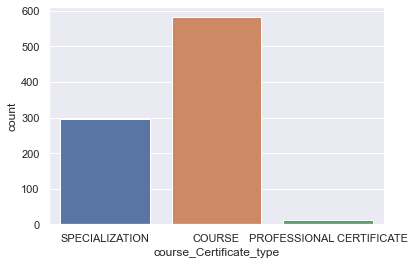

In [12]:
sns.countplot(data = data , x = 'course_Certificate_type')

<AxesSubplot:xlabel='course_rating', ylabel='count'>

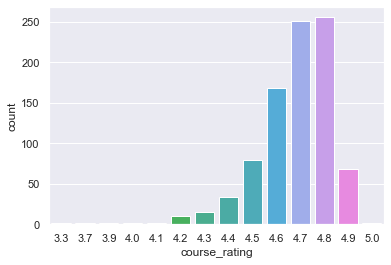

In [13]:
sns.countplot(data = data , x = 'course_rating')

<AxesSubplot:xlabel='course_difficulty', ylabel='count'>

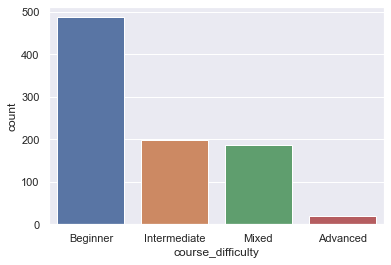

In [14]:
sns.countplot(data = data , x = 'course_difficulty')

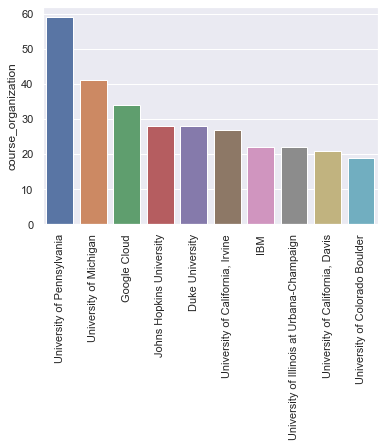

In [15]:
organization = pd.DataFrame(data['course_organization'].value_counts()).head(10)
sns.barplot(x = organization.index , y = organization.course_organization)
plt.xticks(rotation = 90);

### 4.2 Top organisations

In [16]:
org1 = data.groupby(['course_organization'])['course_rating'].mean()
org1 = org1.sort_values(ascending=False).head(10)
org1

course_organization
Hebrew University of Jerusalem                 4.900000
Nanyang Technological University, Singapore    4.900000
Universidade Estadual de Campinas              4.900000
Crece con Google                               4.900000
London Business School                         4.900000
Google - Spectrum Sharing                      4.900000
ScrumTrek                                      4.900000
Universidade de São Paulo                      4.866667
The University of Chicago                      4.850000
Universidad de los Andes                       4.820000
Name: course_rating, dtype: float64

In [17]:
org2 = data.groupby(['course_organization'])['course_students_enrolled'].agg('sum')
org2 = org2.sort_values(ascending=False).head(10)
org2

course_organization
University of Michigan              7437700
University of Pennsylvania          5501300
Stanford University                 4854000
University of California, Irvine    4326000
Johns Hopkins University            4298900
Duke University                     3967600
Yale University                     3952000
IBM                                 2956400
deeplearning.ai                     2863400
Google Cloud                        2604300
Name: course_students_enrolled, dtype: int64

In [18]:
data[["course_rating","course_students_enrolled"]].describe()

,course_rating,course_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


### 4.3 Top Courses

In [19]:
top_enrolled_course = data.sort_values(by=['course_students_enrolled'], ascending=False).head(10)
# sns.barplot(x = top_enrolled_course.course_title, y = top_enrolled_course.course_students_enrolled)
# plt.xticks(rotation = 90);
top_enrolled_course[["course_title", "course_students_enrolled"]]

,course_title,course_students_enrolled
564,Machine Learning,3200000
815,The Science of Well-Being,2500000
688,Python for Everybody,1500000
674,Programming for Everybody (Getting Started wit...,1300000
196,Data Science,830000
129,Career Success,790000
261,English for Career Development,760000
765,Successful Negotiation: Essential Strategies a...,750000
199,Data Science: Foundations using R,740000
211,Deep Learning,690000


In [20]:
top_rated_course = data.sort_values(by=['course_rating'], ascending=False).head(10)
# sns.barplot(x = top_rated_course.course_title, y = top_rated_course.course_rating)
# plt.xticks(rotation = 90);
top_rated_course[["course_title", "course_rating"]]

,course_title,course_rating
251,El Abogado del Futuro: Legaltech y la Transfor...,5.0
432,Infectious Disease Modelling,5.0
754,Stories of Infection,4.9
290,Everyday Parenting: The ABCs of Child Rearing,4.9
98,Boosting Creativity for Innovation,4.9
99,"Brand Management: Aligning Business, Brand and...",4.9
614,More Introduction to Financial Accounting,4.9
102,Bugs 101: Insect-Human Interactions,4.9
836,Understanding Einstein: The Special Theory of ...,4.9
103,Build a Modern Computer from First Principles:...,4.9


<AxesSubplot:xlabel='course_rating', ylabel='course_students_enrolled'>

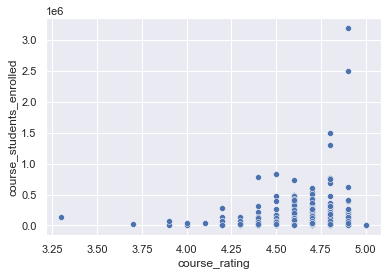

In [21]:
sns.scatterplot(data = data, x = "course_rating", y = "course_students_enrolled")

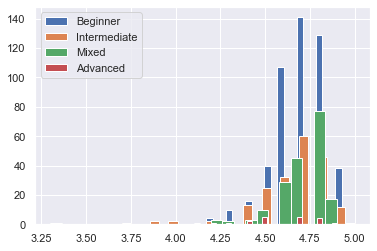

In [22]:
for x in ["Beginner", "Intermediate", "Mixed", "Advanced"]:
    to_plot = data.loc[data["course_difficulty"] == x]
    plt.hist(to_plot["course_rating"], bins = 25, label = x)
    
plt.legend()

## 5. Hypothesis Testing

In this section, we raised 3 hypotheses including

> 1. Beginner vs Intermediate <br>
> $H_0: \mu_B = \mu_I$ <br>
> $H_1: \mu_B \ne \mu_I$

> 2. Beginner vs Mixed <br>
> $H_0: \mu_B = \mu_M$ <br>
> $H_1: \mu_B \ne \mu_M$

> 3. Beginner vs Advanced <br>
> $H_0: \mu_B = \mu_A$ <br>
> $H_1: \mu_B \ne \mu_A$

But we will more focus in the first hypothesis. Therefore, we start by finding means and variances of rating in beginner and intermediate courses as follows.

In [23]:
beginner = data.loc[data["course_difficulty"] == 'Beginner']
beginner["course_rating"].describe()

count    487.000000
mean       4.680903
std        0.141947
min        4.100000
25%        4.600000
50%        4.700000
75%        4.800000
max        5.000000
Name: course_rating, dtype: float64

In [24]:
intermediate = data.loc[data["course_difficulty"] == 'Intermediate']
intermediate["course_rating"].describe()

count    198.000000
mean       4.646465
std        0.188939
min        3.700000
25%        4.600000
50%        4.700000
75%        4.800000
max        5.000000
Name: course_rating, dtype: float64

### 5.1  T-test

T-test is applied to test the hypothesis between two populations. 

In [25]:
from scipy import stats

t_value,p_value=stats.ttest_ind(beginner["course_rating"],intermediate["course_rating"])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f'%p_value)

Test statistic is 2.603359
p-value for two tailed test is 0.009432


P-value is less than 0.05. Thus, beginner and intermediate courses statistically have the same rating. 

## 6. Summary

The points are concluded below

> <li> Coursera has more beginner courses than other difficulties. </li>
> <li> The courses related to Data Science and Machine Learning are likely to have more enrolled students </li>
> <li> All courses are rated above 4.1 </li>
> <li> Beginner and Intermediate courses are rated same statistically </li>
> <li> University of Pennsylvania has more courses but less students than University of Michigan. The reason should be further investigated for benefits of University of Pennsylvania which has the highest number of courses in Coursera </li>